In [0]:
!git clone https://github.com/Aman-py/data.git

Cloning into 'data'...
remote: Enumerating objects: 21779, done.
remote: Total 21779 (delta 0), reused 0 (delta 0), pack-reused 21779
Receiving objects: 100% (21779/21779), 293.27 MiB | 40.29 MiB/s, done.
Checking out files: 100% (21778/21778), done.


In [0]:
!dir

data  sample_data


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import matplotlib.image as mpimg

In [0]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,Dense,MaxPooling2D,Dropout,Flatten
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import random
import ntpath

Using TensorFlow backend.


In [0]:
datadir = 'data'

In [0]:
columns = ['center','left','right','steering','throttle','reverse','speed']

In [0]:
dataset = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=columns)

In [0]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
1,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
2,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079
3,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
4,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079


In [0]:
def removePath(path):
  base,tail = ntpath.split(path)
  return tail

In [0]:
path = removePath('/home/aman-py/Desktop/Self-Driving-Car/data/I')

In [0]:
dataset['center'] = dataset['center'].apply(removePath)

In [0]:
dataset['left'] = dataset['left'].apply(removePath)

In [0]:
dataset['right'] = dataset['right'].apply(removePath)

In [0]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_10_17_16_36_30_865.jpg,left_2018_10_17_16_36_30_865.jpg,right_2018_10_17_16_36_30_865.jpg,0.0,0.0,0.0,0.000078
1,center_2018_10_17_16_36_30_966.jpg,left_2018_10_17_16_36_30_966.jpg,right_2018_10_17_16_36_30_966.jpg,0.0,0.0,0.0,0.000078
2,center_2018_10_17_16_36_31_098.jpg,left_2018_10_17_16_36_31_098.jpg,right_2018_10_17_16_36_31_098.jpg,0.0,0.0,0.0,0.000079
3,center_2018_10_17_16_36_31_253.jpg,left_2018_10_17_16_36_31_253.jpg,right_2018_10_17_16_36_31_253.jpg,0.0,0.0,0.0,0.000078
4,center_2018_10_17_16_36_31_366.jpg,left_2018_10_17_16_36_31_366.jpg,right_2018_10_17_16_36_31_366.jpg,0.0,0.0,0.0,0.000079


In [0]:
num_bins = 25

In [0]:
hist,bins = np.histogram(dataset['steering'],num_bins)

In [0]:
print(hist)
print(bins)

[  48   16   13   15   21   36   48   69  161  174  337  239 5454   56
  160   82   97   99   37   25   32   15   12    5    8]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [0]:
center = (bins[:-1]+bins[1:])*0.5

In [0]:
center

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

In [0]:
center1 = []
for i in range(0,len(bins)-1):
  x = (bins[i] + bins[i+1]) * 0.5
  center1.append(x)

In [0]:
center1

[-0.96,
 -0.88,
 -0.8,
 -0.72,
 -0.6399999999999999,
 -0.56,
 -0.48,
 -0.39999999999999997,
 -0.32,
 -0.24,
 -0.15999999999999998,
 -0.08000000000000002,
 0.0,
 0.08000000000000007,
 0.16000000000000003,
 0.24,
 0.32000000000000006,
 0.4,
 0.48,
 0.56,
 0.64,
 0.72,
 0.8,
 0.88,
 0.96]

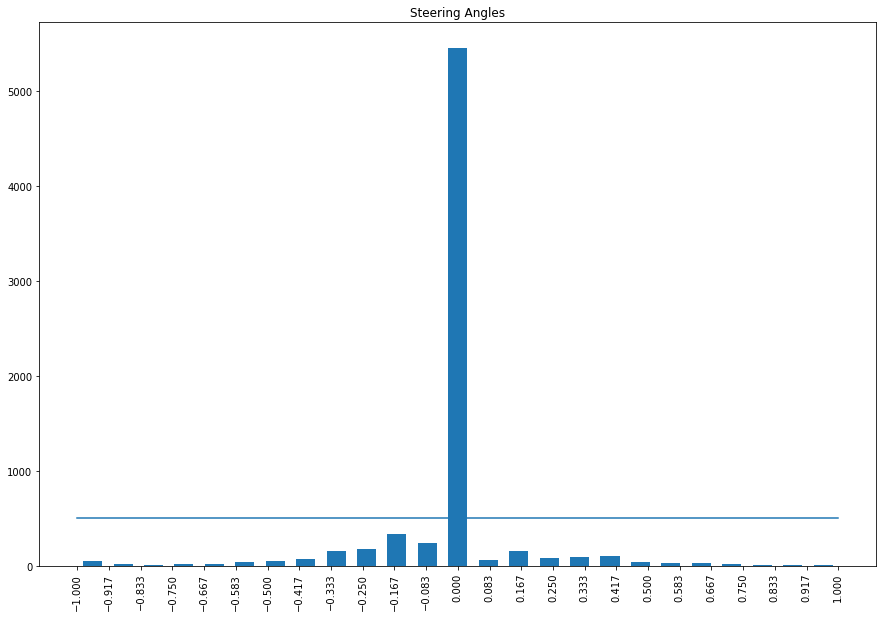

In [0]:
threshold = 500
plt.figure(figsize=(15,10))
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [0]:
remove_list = []
for i in range(num_bins):
  List = []
  for j in range(len(dataset['steering'])):
    if dataset['steering'][j] >= bins[i] and dataset['steering'][j] <= bins[i+1]:
      List.append(j)
  List = shuffle(List)
  List = List[threshold:]
  remove_list.extend(List)

In [0]:
len(dataset['steering']) 

7259

In [0]:
len(remove_list)

4954

In [0]:
dataset.drop(dataset.index[remove_list],inplace=True)

In [0]:
hist,_ = np.histogram(dataset['steering'],num_bins)

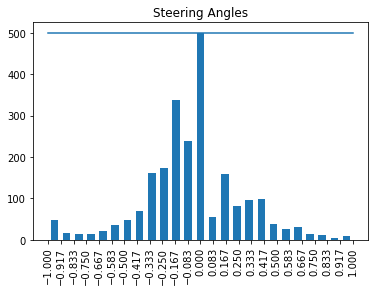

In [0]:
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [0]:
dataset.iloc[1]

center      center_2018_10_17_16_36_32_899.jpg
left          left_2018_10_17_16_36_32_899.jpg
right        right_2018_10_17_16_36_32_899.jpg
steering                                     0
throttle                                     0
reverse                                      0
speed                              7.88855e-05
Name: 17, dtype: object

In [0]:
def loadImageSteering(datadir,dataset):
  imagePath = []
  steeringPath = []
  for i in range(len(dataset)):
    center = dataset.iloc[i][0]
    steering = float(dataset.iloc[i][3])
    imagePath.append(os.path.join(datadir,center))
    steeringPath.append(steering)
  imagePath = np.asarray(imagePath)
  steeringPath = np.asarray(steeringPath)
  return imagePath,steeringPath

In [0]:
imagePath,steeringPath = loadImageSteering(datadir+'/IMG',dataset)

In [0]:
imagePath[0]

'data/IMG/center_2018_10_17_16_36_31_366.jpg'

In [0]:
steeringPath[0]

0.0

In [0]:
len(steeringPath)

2305

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(imagePath,steeringPath,random_state=6,test_size=0.2)

In [0]:
len(x_train)

1844

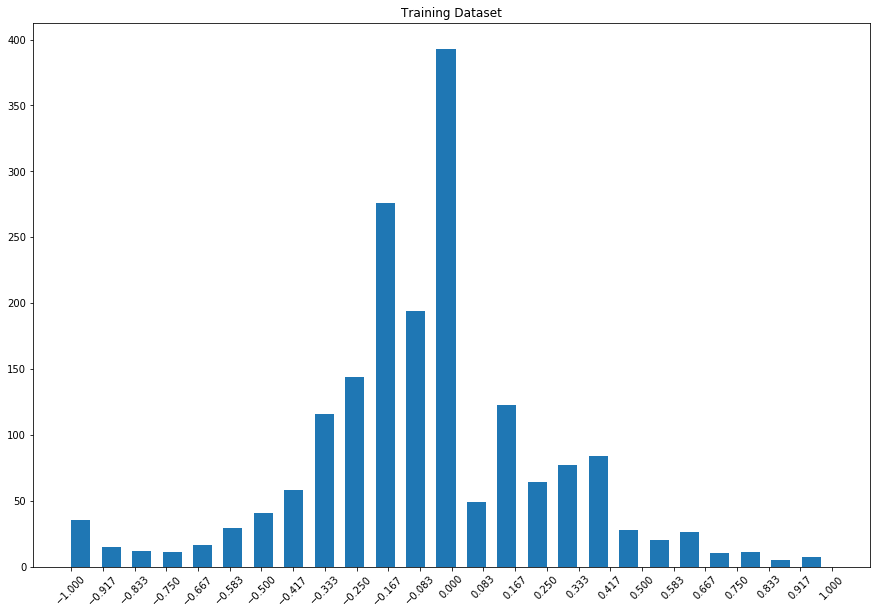

In [0]:
plt.figure(figsize=(15,10))
plt.hist(y_train,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Training Dataset")
plt.show()

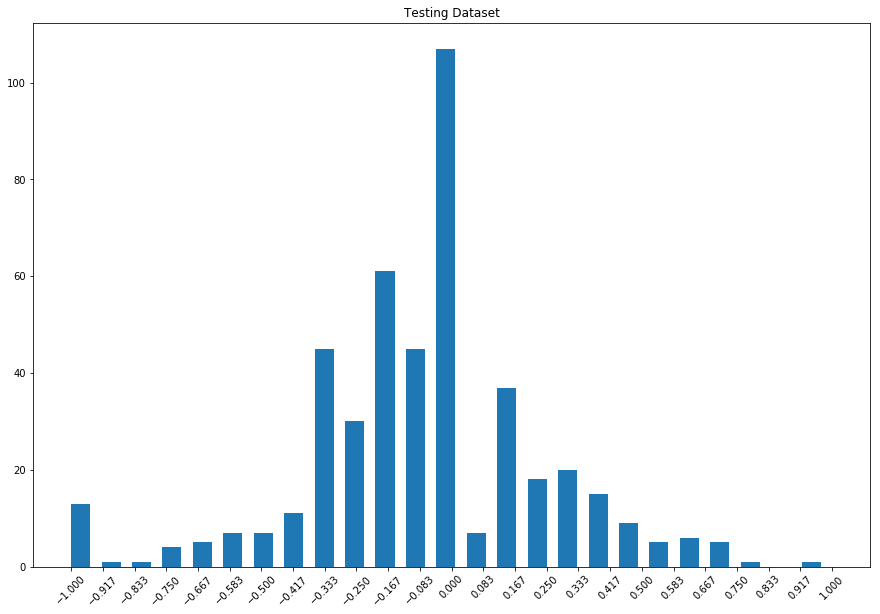

In [0]:
plt.figure(figsize=(15,10))
plt.hist(y_test,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Testing Dataset")
plt.show()

In [0]:
def imagePreprocessing(img):
  img = mpimg.imread(img)
  img = img[60:135,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img

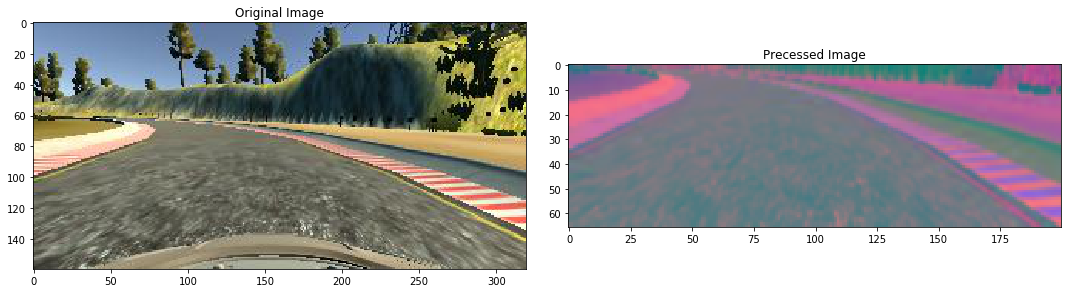

In [0]:
image = imagePath[1]
image = mpimg.imread(image)
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].grid(False)
axs[0].set_title("Original Image")
axs[1].imshow(imagePreprocessing(imagePath[1]))
axs[1].grid(False)
axs[1].set_title("Precessed Image")
plt.show()

In [0]:
x_train = np.array(list(map(imagePreprocessing,x_train)))

In [0]:
x_test = np.array(list(map(imagePreprocessing,x_test)))

In [0]:
from google.colab import files

ModuleNotFoundError: No module named 'google.colab'

In [0]:
#upload = files.upload()

In [0]:
img = plt.imread('nvidia architectue.png')

FileNotFoundError: ignored

In [0]:
plt.figure(figsize=(15,50))
plt.imshow(img)
plt.title("NVIDIA Architecture")

In [0]:
def nvidiaModel():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation="elu")) 
  model.add(Convolution2D(64,(3,3),activation="elu"))   
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3),loss="mse")
  
  return model

In [0]:
model = nvidiaModel()

W0719 08:04:04.835520 140324993271680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 08:04:04.879173 140324993271680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 08:04:04.888861 140324993271680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 08:04:04.967409 140324993271680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 08:04:04.977827 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
__________

In [0]:
h = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=100,shuffle=1,verbose=1)

Train on 1844 samples, validate on 461 samples
Epoch 1/100
1844/1844 [==============================] - 1s 606us/step - loss: 0.0636 - val_loss: 0.0612
Epoch 2/100
1844/1844 [==============================] - 1s 582us/step - loss: 0.0612 - val_loss: 0.0640
Epoch 3/100
1844/1844 [==============================] - 1s 561us/step - loss: 0.0617 - val_loss: 0.0621
Epoch 4/100
1844/1844 [==============================] - 1s 565us/step - loss: 0.0624 - val_loss: 0.0646
Epoch 5/100
1844/1844 [==============================] - 1s 577us/step - loss: 0.0644 - val_loss: 0.0645
Epoch 6/100
1844/1844 [==============================] - 1s 592us/step - loss: 0.0622 - val_loss: 0.0614
Epoch 7/100
1844/1844 [==============================] - 1s 593us/step - loss: 0.0620 - val_loss: 0.0645
Epoch 8/100
1844/1844 [==============================] - 1s 578us/step - loss: 0.0564 - val_loss: 0.0594
Epoch 9/100
1844/1844 [==============================] - 1s 560us/step - loss: 0.0542 - val_loss: 0.0638
Epoch 10

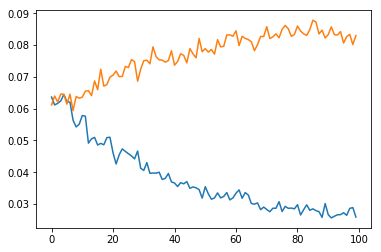

In [0]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [0]:
model.save('self_drive.h5')

In [0]:
from google.colab import files

In [0]:
files.download('self_drive.h5')

In [0]:
type('car.h5')

str